In [14]:
    #['0 intensitySum:' '1 intensityShare' '2 hairpixels' '3 imagepixels' '4 percentage'
    # '5 all pixels' '6 number of section' '7 number of section inclosed'
    # '8 outerSectionSum' '9 outerSectionPercentage' '10 innerSectionSum'
    # '11 innserSectionAvgSize' '12 innerSectionAvgSize Percentage'
    # '13 innerSectionSizeVariance' '14 std' '15 all pixels' '16 number of section'
    # '17 number of section inclosed' '18 outerSectionSum' '19 outerSectionPercentage'
    # '20 innerSectionSum' '21 innserSectionAvgSize' '22 innerSectionAvgSize Percentage'
    # '23 innerSectionSizeVariance' '24 std', 25 densehairSum, 26 loosehair sum, 27 intensity sum in loose hair, 28 intensity sum in dense hair]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#alldata = np.load('HairEstimationPython/Users/Bina/data/calibrationData.out' + '.npy')
#keys = np.load('HairEstimationPython/Users/Bina/data/calibkeyData.out' + '.npy')
#hairAmount = np.load('HairEstimationPython/Users/Bina/data/calibhairAmount.out' + '.npy')
alldata = np.load('HairEstimationPython/Users/Mummel/data/calibrationData.out' + '.npy')
keys = np.load('HairEstimationPython/Users/Mummel/data/calibkeyData.out' + '.npy')
hairAmount = np.load('HairEstimationPython/Users/Mummel/data/calibhairAmount.out' + '.npy')
denseinnerSectionSize = alldata[20::np.size(keys)]
denseSectionperc = alldata[19::np.size(keys)]
hairSectionSize = alldata[10::np.size(keys)]
outerSectionPerc = alldata[9::np.size(keys)]
origperc = alldata[4::np.size(keys)]
hairpixels = alldata[2::np.size(keys)]
hairAmount = np.array(list(map(int, hairAmount)))
secn = alldata[7::np.size(keys)]#number of inner sections
denseHairSum = alldata[25::np.size(keys)]
looseHairSum = alldata[26::np.size(keys)]
intensitySum = alldata[0::np.size(keys)]
intensityShare = alldata[1::np.size(keys)]
backgroundSectionNum = alldata[7::np.size(keys)]
denseSectionNum = alldata[17::np.size(keys)]
denseSectionAVGSize = alldata[21::np.size(keys)]
looseSectionAVGSize = alldata[11::np.size(keys)]
#denseHairSum = 2*denseHairSum
#looseHairSum = 1/2 * looseHairSum
allPixels = alldata[3::np.size(keys)]
looseIntensity = alldata[27::np.size(keys)]
denseIntensity = alldata[28::np.size(keys)]


hairPerc = ((looseHairSum+denseHairSum)/allPixels) * 100

innersec = 1- alldata[9::np.size(keys)]
denseSec = 1- alldata[19::np.size(keys)]
loosestd = alldata[14::np.size(keys)]

print(hairPerc)
print(hairAmount)

[ 3.54775332  2.24756785  2.94784421  4.42278142  4.81091986  5.81790627
  4.34414472  5.79387789  7.34644555  7.25422939  7.91494124 10.47373285]
[15 15 18 22 22 25 30 30 37 40 60 95]


Text(0, 0.5, 'amount of hair')

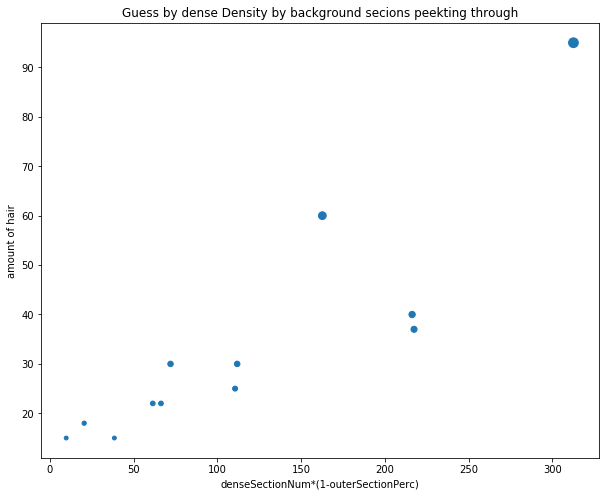

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(denseSectionNum*(1-outerSectionPerc),hairAmount,hairAmount)
ax.set_title('Guess by dense Density by background secions peekting through')
ax.set_xlabel('denseSectionNum*(1-outerSectionPerc)')
ax.set_ylabel('amount of hair')

Text(0, 0.5, 'amount of hair')

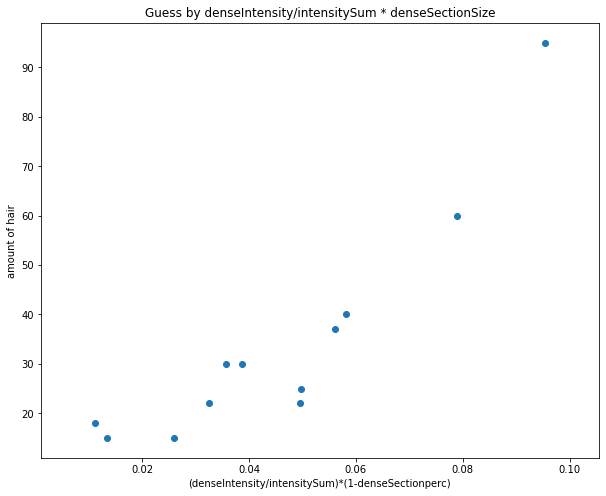

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter((denseIntensity/intensitySum)*(1-denseSectionperc),hairAmount)
ax.set_title('Guess by denseIntensity/intensitySum * denseSectionSize')
ax.set_xlabel('(denseIntensity/intensitySum)*(1-denseSectionperc)')
ax.set_ylabel('amount of hair')

Text(0, 0.5, 'amount of hair')

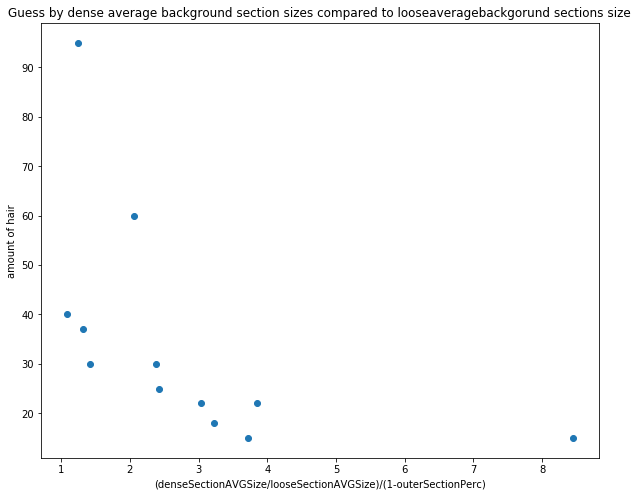

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter((denseSectionAVGSize/looseSectionAVGSize)/(1-outerSectionPerc),hairAmount)
ax.set_title('Guess by dense average background section sizes compared to looseaveragebackgorund sections size')
ax.set_xlabel('(denseSectionAVGSize/looseSectionAVGSize)/(1-outerSectionPerc)')
ax.set_ylabel('amount of hair')

Text(0, 0.5, 'amount of hair')

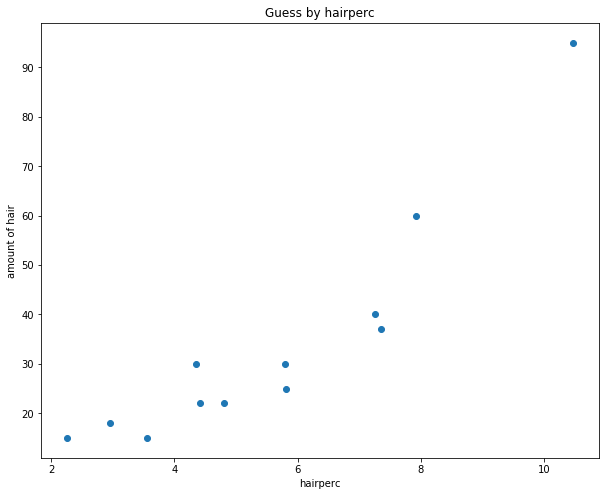

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(hairPerc,hairAmount)
ax.set_title('Guess by hairperc')
ax.set_xlabel('hairperc')
ax.set_ylabel('amount of hair')

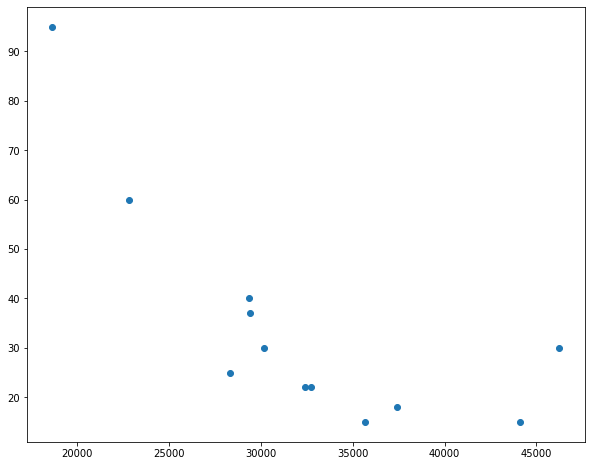

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(loosestd/(1-outerSectionPerc),hairAmount)

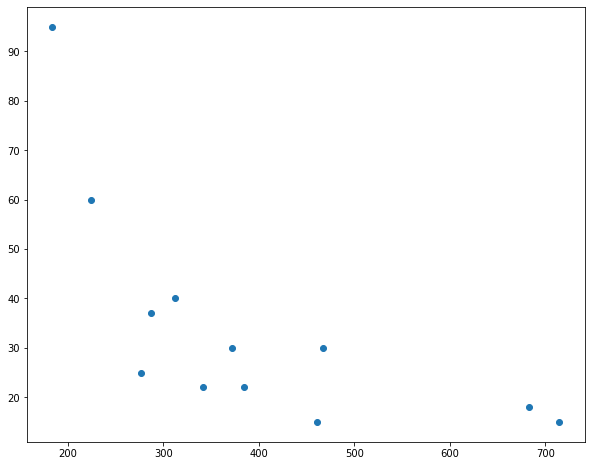

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(looseSectionAVGSize/hairPerc,hairAmount)

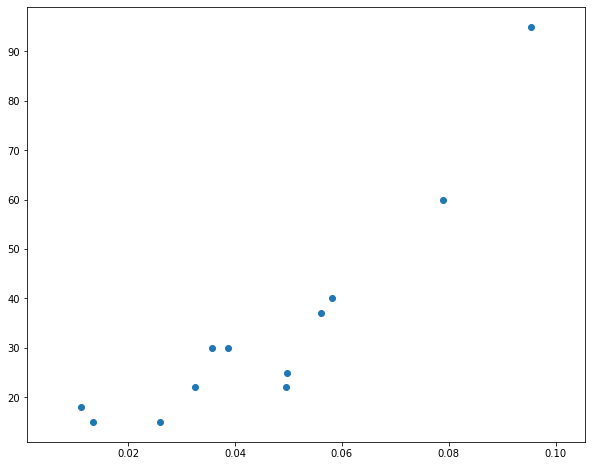

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
#x.scatter(looseIntensity,hairAmount)
#x.scatter(denseIntensity,hairAmount)
#ax.scatter(intensitySum,hairAmount)
#ax.scatter(intensityShare,hairAmount)
#ax.scatter(denseIntensity*(1-outerSectionPerc),hairAmount)
#ax.scatter(looseIntensity*(1-outerSectionPerc),hairAmount)
#x.scatter(looseIntensity/denseIntensity,hairAmount)
#x.scatter(looseIntensity/intensitySum,hairAmount)
#ax.scatter((denseIntensity/intensitySum)*(1-outerSectionPerc),hairAmount)# I like this one. soft exp
ax.scatter((denseIntensity/intensitySum)*(1-denseSectionperc),hairAmount) # <--this one's not bad either- very soft exp
#ax.scatter((looseIntensity/intensitySum)*(1-outerSectionPerc),hairAmount)#thats a mess lol
#ax.scatter((looseIntensity/intensitySum)*(1-(outerSectionPerc-denseSectionperc)),hairAmount)#kinda log
#ax.scatter(denseIntensity*denseHairSum,hairAmount)# nice lin
#ax.scatter(denseIntensity*denseHairSum*(1-denseSectionperc),hairAmount)# also lin. I like this one more than ^
#ax.scatter((denseIntensity/denseHairSum)*(1-denseSectionperc),hairAmount)#<--more spread out in the bottom
#ax.scatter((looseIntensity/looseHairSum)*(1-(outerSectionPerc-denseSectionperc)),hairAmount)

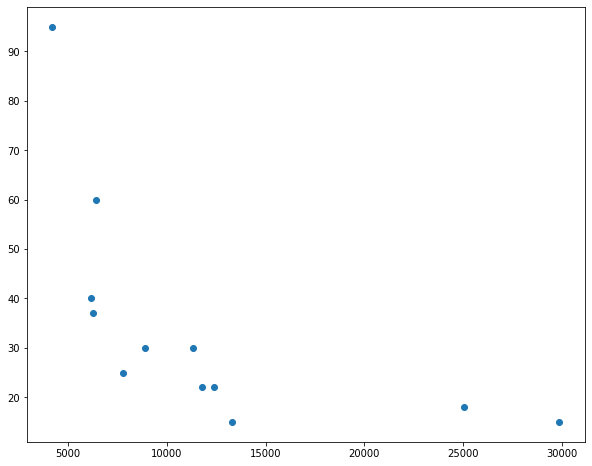

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(denseSectionAVGSize,hairAmount)
#ax.scatter(looseSectionAVGSize,hairAmount)
#ax.scatter(denseSectionAVGSize/(1-outersectionperc),hairAmount)
#ax.scatter((denseSectionAVGSize/looseSectionAVGSize)/(1-outersectionperc),hairAmount)
ax.scatter(denseSectionAVGSize/(1-denseSectionperc),hairAmount)

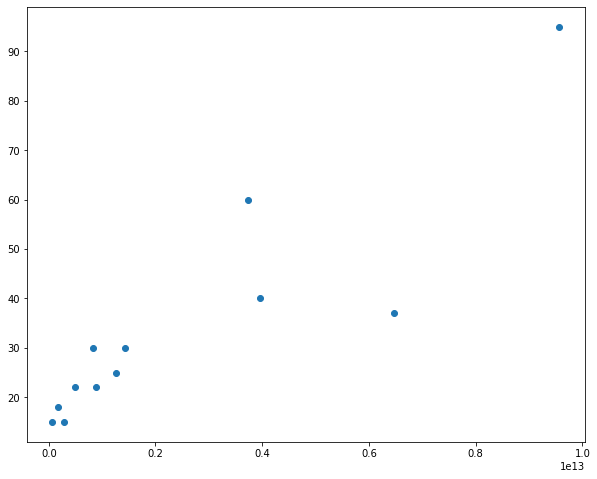

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(intensitySum,hairAmount)
#ax.scatter(intensityShare*(1-outersectionperc),hairAmount)
#ax.scatter(intensitySum*(1-outersectionperc),hairAmount)<

s = intensitySum*hairpixels*(1-outerSectionPerc)

ax.scatter(intensitySum*hairpixels*(1-outerSectionPerc),hairAmount)

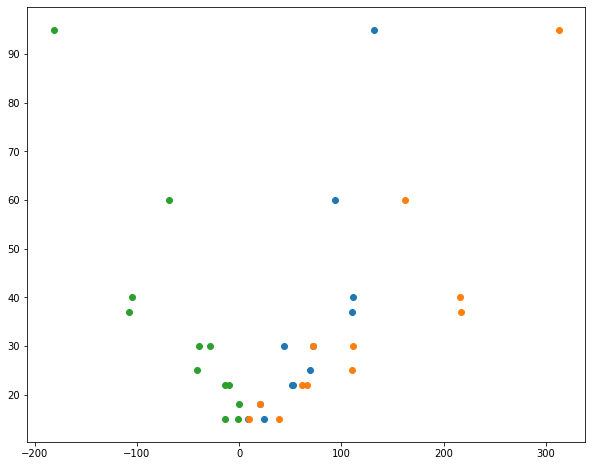

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(backgroundSectionNum*(1-outerSectionPerc),hairAmount)
ax.scatter(denseSectionNum*(1-outerSectionPerc),hairAmount)
ax.scatter((backgroundSectionNum-denseSectionNum)*(1-outerSectionPerc),hairAmount)

No handles with labels found to put in legend.


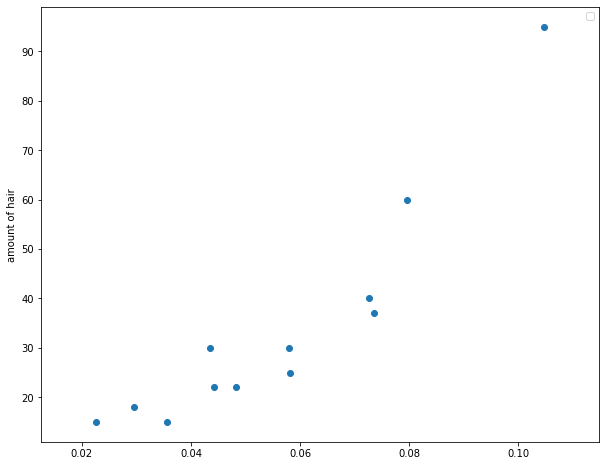

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(secn/(1-outersectionperc),hairAmount)#
#ax.scatter(denseHairSum/hairpixels,hairAmount)#anteil of hair that is in dense section
#ax.scatter(denseHairSum/denseinnerSectionSize,hairAmount)#density of hair in dense section
#ax.scatter(hairpixels/hairSectionSize,hairAmount)#dichte der haare
ax.scatter((hairpixels/hairSectionSize)*(1-outerSectionPerc),hairAmount)#dichte * haarsection size .this one is nice
#ax.scatter((hairpixels/hairSectionSize)*(1-outersectionperc)*hairperc,hairAmount)# this one's not bad either
#ax.scatter((((denseHairSum/denseinnerSectionSize)*(1-outersectionperc))),hairAmount)#anteil of hair that is in dense section
#ax.scatter((((denseHairSum/denseinnerSectionSize)*(1-denseSectionperc))),hairAmount)#density of dense section in realtion to section size
#ax.scatter(((hairpixels-denseHairSum)/(hairSectionSize-denseinnerSectionSize))*((1-outersectionperc)-(1-denseSectionperc)),hairAmount)



denseDensity = (((denseHairSum/denseinnerSectionSize)*(1-denseSectionperc)))
looseDensity = ((hairpixels-denseHairSum)/(hairSectionSize-denseinnerSectionSize))*((1-outerSectionPerc)-(1-denseSectionperc))
#ax.scatter(denseDensity/looseDensity,hairAmount)

ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


[0.07835863 0.04684654 0.08050605 0.10934626 0.11688727 0.12982964
 0.1095339  0.1571367  0.17028794 0.18907564 0.15921207 0.19214725]


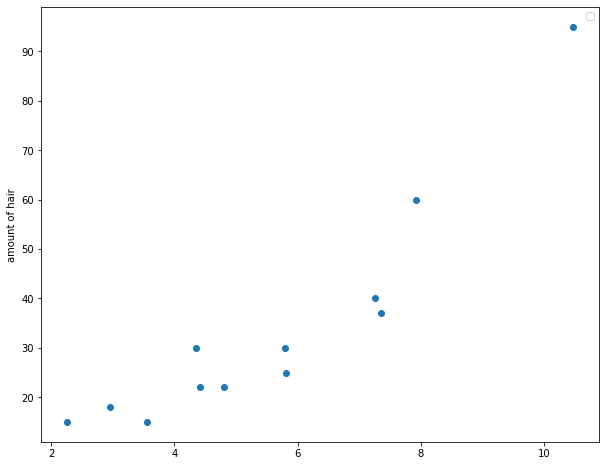

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
print(1-outerSectionPerc)
ax.scatter(hairPerc,hairAmount)#hair density. hairpixels/
ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


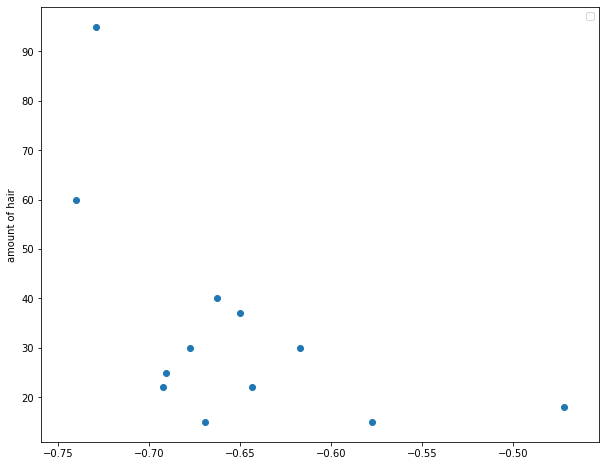

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter( denseSec-
denseHairSum/hairpixels,hairAmount)

ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

NameError: name 'outersectionperc' is not defined

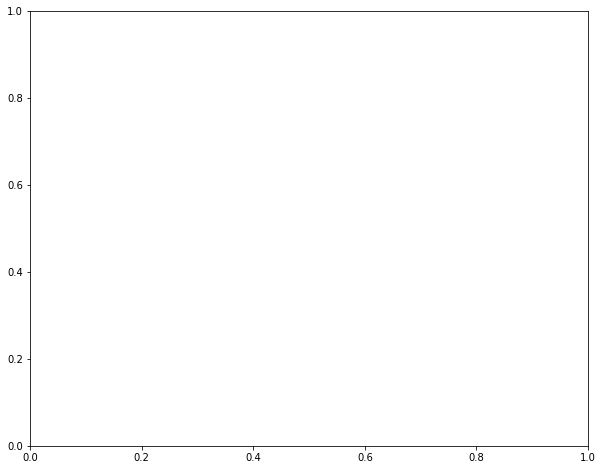

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(innersec,hairAmount,label='innersec')
print(1-outersectionperc)
ax.scatter(denseSec,hairAmount,label='denseSec')
ax.scatter(denseSec/(1-outersectionperc),hairAmount, label ='denseSec/(1-outersectionperc)')

ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
x = np.linspace(0, diff.max(), 100)
m = diff.mean()

print(m)
ax.plot(x, x-m)
ax.grid()
ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()
z = zip(hairAmount, diff)
print(list(z))

In [ ]:
import numpy as np
import math
def PGPremoveOutlier(PData, Pp1, Pp2):
    # phase 1
    mu1 = PData.mean()
    sigma1 = math.sqrt(PData.var())  # std = standardabweichung (wie stats.binom.std()).
    k = 1 / math.sqrt(Pp1)
    odv1U = mu1 + k * sigma1
    odv1L = mu1 - k * sigma1
    # print('mu1 ',mu1, 'sigma: ',sigma1, 'k ', k, odv1U, odv1L)
    NewData = np.array([i for i in PData if i <= odv1U])
    NewData = np.array([i for i in NewData if i >= odv1L])

    # phase2
    mu2 = NewData.mean()
    sigma2 = math.sqrt(PData.var())
    k = 1 / math.sqrt(Pp2)
    odv2U = mu2 + k * sigma2
    odv2L = mu2 - k * sigma2
    NewData = np.array([i for i in NewData if i <= odv2U])
    NewData = np.array([i for i in NewData if i >= odv2L])

    return NewData

In [12]:
n = np.array([18.84759, 22.70800, 18.84759, 22.70800, 19.38002, 22.33196, 3.55758, 1.08649,
 99.02454 ,24.26115, 29.87332, 17.52103 ,10.73953, 30.00000, 32.48613, 29.12726])

In [13]:
m = PGPremoveOutlier(n, 1.5, 0.1)
print(m)
print(np.mean(m), np.median(m))

NameError: name 'PGPremoveOutlier' is not defined

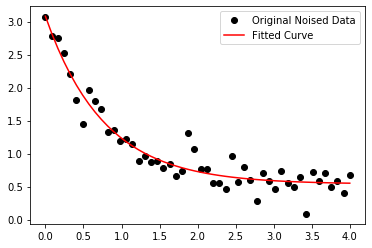

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

plt.figure()
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [15]:
def func(x, a, b, c,d):
    #return a * np.exp(b * x) + c
    #print(b*x)
    #return a * (1 / x) + c
    #return a * np.log(abs(b) * x) + c
    #return a*1/x +b
    return a*x +b

[0.21707948 8.75022464 1.         1.        ]


c:\users\mummel\appdata\local\programs\python\python37-32\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


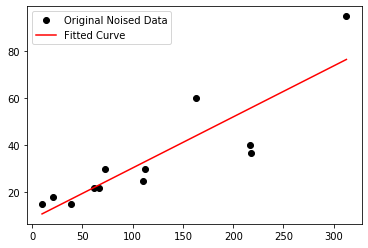

In [16]:
import math
x = denseSectionAVGSize/(1-denseSectionperc)
x = denseSectionAVGSize/(1-denseSectionperc)
x = (hairpixels/hairSectionSize)*(1-outerSectionPerc)*hairPerc
x = intensitySum*hairpixels*(1-outerSectionPerc)
x = denseSectionNum*(1-outerSectionPerc)
y = hairAmount
inds = x.argsort()
x = x[inds]
y = y[inds]
#print(y)
popt, pcov = curve_fit(func, x, y)
print(popt)
plt.figure()
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

1.0838564690809915e-28
found smaller
1.0
0.0009363990273987037
1.0
<function func_divx at 0x0B83B4F8>


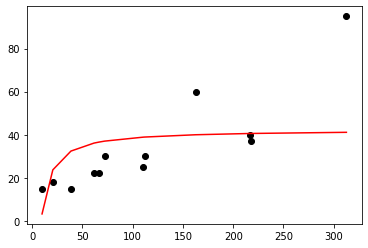

In [17]:
import scipy.stats
def func_exp(x, a, b, c):
    return a * np.exp(b * x) + c
def func_divx(x, a, b):
    return a * (1 / x) + b
def func_log(x, a, b, c):
    return a * np.log(abs(b) * x) + c
def func_lin(x,a,b):
    return a * x + b
def findBestFunction(x, y):
    func = func_exp
    possiblefunc = np.array([func_divx,func_exp,func_lin,func_log])
    minChisq = 5000
    bestFunc = func_lin
    for func in possiblefunc:
        try:
            popt, pcov = curve_fit(func, x, y)
        except:
            continue
        #plt.plot(x, y, 'ko', label="Original Noised Data")
        #plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
        _,chisq = scipy.stats.chisquare(y, func(x, *popt), ddof = 2,axis = 0)
        print(chisq)
        if np.isnan(chisq):
            continue
        if chisq < minChisq:
            print('found smaller')
            minChisq = chisq
            bestFunc = func
    return bestFunc
func = findBestFunction(x,y)
print(func)
popt, pcov = curve_fit(func, x, y)
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.show()

NameError: name 'outersectionperc' is not defined

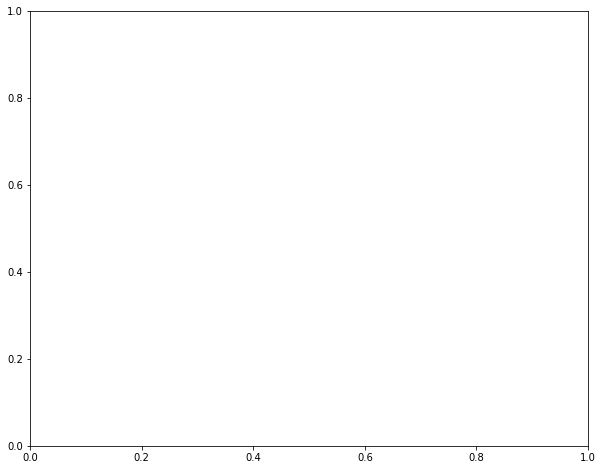

In [18]:
import numpy
fig, ax = plt.subplots(figsize=(10, 8))
print(1-outersectionperc)
ax.scatter(hairPerc,hairAmount)#hair density. hairpixels/
ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')

numpy.polyfit(numpy.log(x), y, 1)

plt.show()
x = hairperc
y = hairAmount

In [ ]:
str = 'exp_exp_log_lin_divx'
def setFunctions(str):
    data = str.split("_")
    print(data)
setFunctions(str)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(backgroundSectionNum*(1-outerSectionPerc),hairAmount)
tag = np.array(['test', 2020])
ax.plot

<BarContainer object of 2 artists>

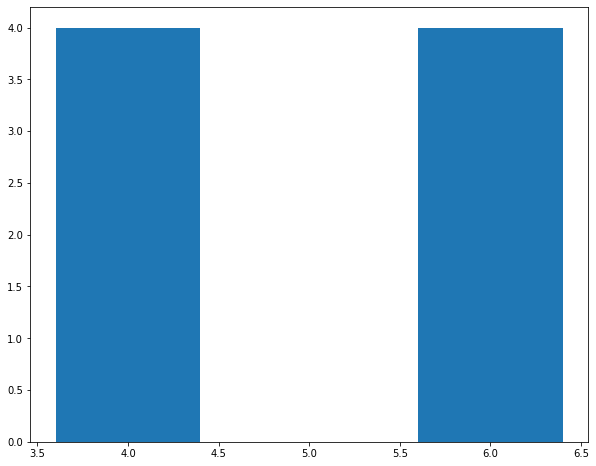

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(np.array([4,6]),4)

In [1]:
43.0/2

21.5

In [2]:
import numpy as np
oldData = np.load('HairEstimationPython/Users/Mummel/data/result.out' + '.npy')

In [11]:
index = 1
estRes = 4
oldest = oldData[index]
oldest = float(oldest)
oldest = int(oldest)
print(oldest)
oldData[index] = oldest + estRes
print(oldData[index])

26
30


In [6]:
for k in keys:
    print('\item',k)

\item intensitySum:
\item intensityShare
\item hairpixels
\item imagepixels
\item percentage
\item all pixels
\item number of section
\item number of section inclosed
\item outerSectionSum
\item outerSectionPercentage
\item innerSectionSum
\item innserSectionAvgSize
\item innerSectionAvgSize Percentage
\item innerSectionSizeVariance
\item std
\item all pixels
\item number of section
\item number of section inclosed
\item outerSectionSum
\item outerSectionPercentage
\item innerSectionSum
\item innserSectionAvgSize
\item innerSectionAvgSize Percentage
\item innerSectionSizeVariance
\item std
\item denseHairSum
\item looseHairSum
\item IntensitySum in Loose Section
\item IntensitySum in Dense Section
